In [3]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
data = pd.read_csv('Carbon Emission.csv')  # Update with your file path

# Display basic info
print(data.head())  # First 5 rows
print(data.info())  # Dataset structure
print(data.describe())  # Statistical summary


    Body Type     Sex         Diet How Often Shower Heating Energy Source  \
0  overweight  female  pescatarian            daily                  coal   
1       obese  female   vegetarian  less frequently           natural gas   
2  overweight    male     omnivore  more frequently                  wood   
3  overweight    male     omnivore      twice a day                  wood   
4       obese  female   vegetarian            daily                  coal   

      Transport Vehicle Type Social Activity  Monthly Grocery Bill  \
0        public          NaN           often                   230   
1  walk/bicycle          NaN           often                   114   
2       private       petrol           never                   138   
3  walk/bicycle          NaN       sometimes                   157   
4       private       diesel           often                   266   

  Frequency of Traveling by Air  Vehicle Monthly Distance Km Waste Bag Size  \
0                    frequently      

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
Body Type                           0
Sex                                 0
Diet                                0
How Often Shower                    0
Heating Energy Source               0
Transport                           0
Vehicle Type                     6721
Social Activity                     0
Monthly Grocery Bill                0
Frequency of Traveling by Air       0
Vehicle Monthly Distance Km         0
Waste Bag Size                      0
Waste Bag Weekly Count              0
How Long TV PC Daily Hour           0
How Many New Clothes Monthly        0
How Long Internet Daily Hour        0
Energy efficiency                   0
Recycling                           0
Cooking_With                        0
CarbonEmission                      0
dtype: int64


In [5]:
# Fill missing values in Vehicle Type with "Unknown"
data['Vehicle Type'] = data['Vehicle Type'].fillna('Unknown')


In [6]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Define categorical and numerical features
categorical_features = [
    'Body Type', 'Sex', 'Diet', 'How Often Shower',
    'Heating Energy Source', 'Transport', 'Social Activity',
    'Frequency of Traveling by Air', 'Waste Bag Size', 'Energy efficiency', 'Vehicle Type'
]
numerical_features = [
    'Monthly Grocery Bill', 'Vehicle Monthly Distance Km',
    'Waste Bag Weekly Count', 'How Long TV PC Daily Hour',
    'How Many New Clothes Monthly', 'How Long Internet Daily Hour'
]

# Preprocessing: Scaling numerical and encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Apply the preprocessing to the dataset
X = data[numerical_features + categorical_features]
X_transformed = preprocessor.fit_transform(X)

# Display shape of the transformed data
print("Transformed Data Shape:", X_transformed.shape)


Transformed Data Shape: (10000, 47)


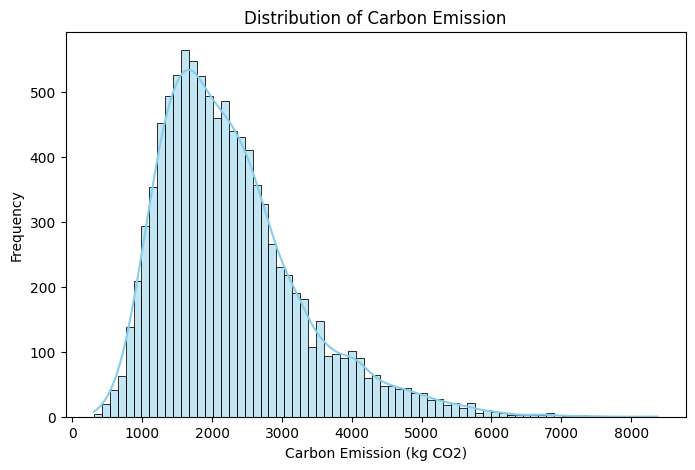

In [7]:
# 1. Distribution of Carbon Emission
plt.figure(figsize=(8, 5))
sns.histplot(data['CarbonEmission'], kde=True, color='skyblue')
plt.title('Distribution of Carbon Emission')
plt.xlabel('Carbon Emission (kg CO2)')
plt.ylabel('Frequency')
plt.show()

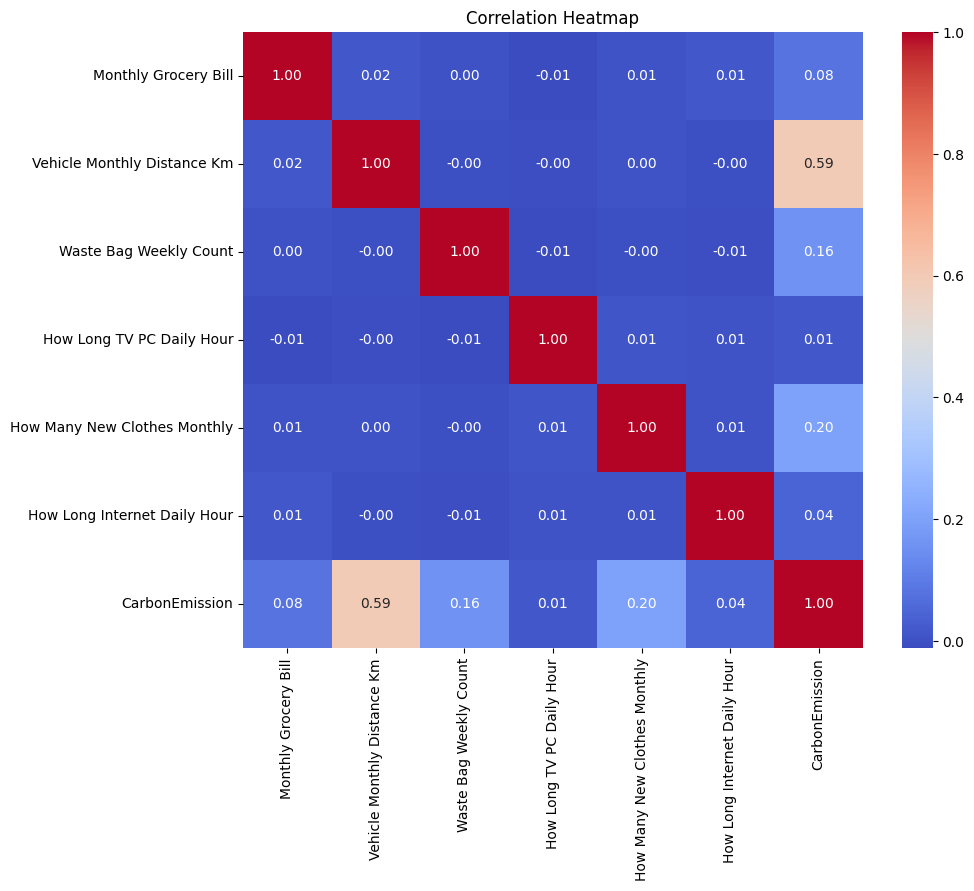

In [8]:
# 2. Correlation Heatmap
# Combine numerical columns with target for correlation
numerical_features_with_target = numerical_features + ['CarbonEmission']
correlation_matrix = data[numerical_features_with_target].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

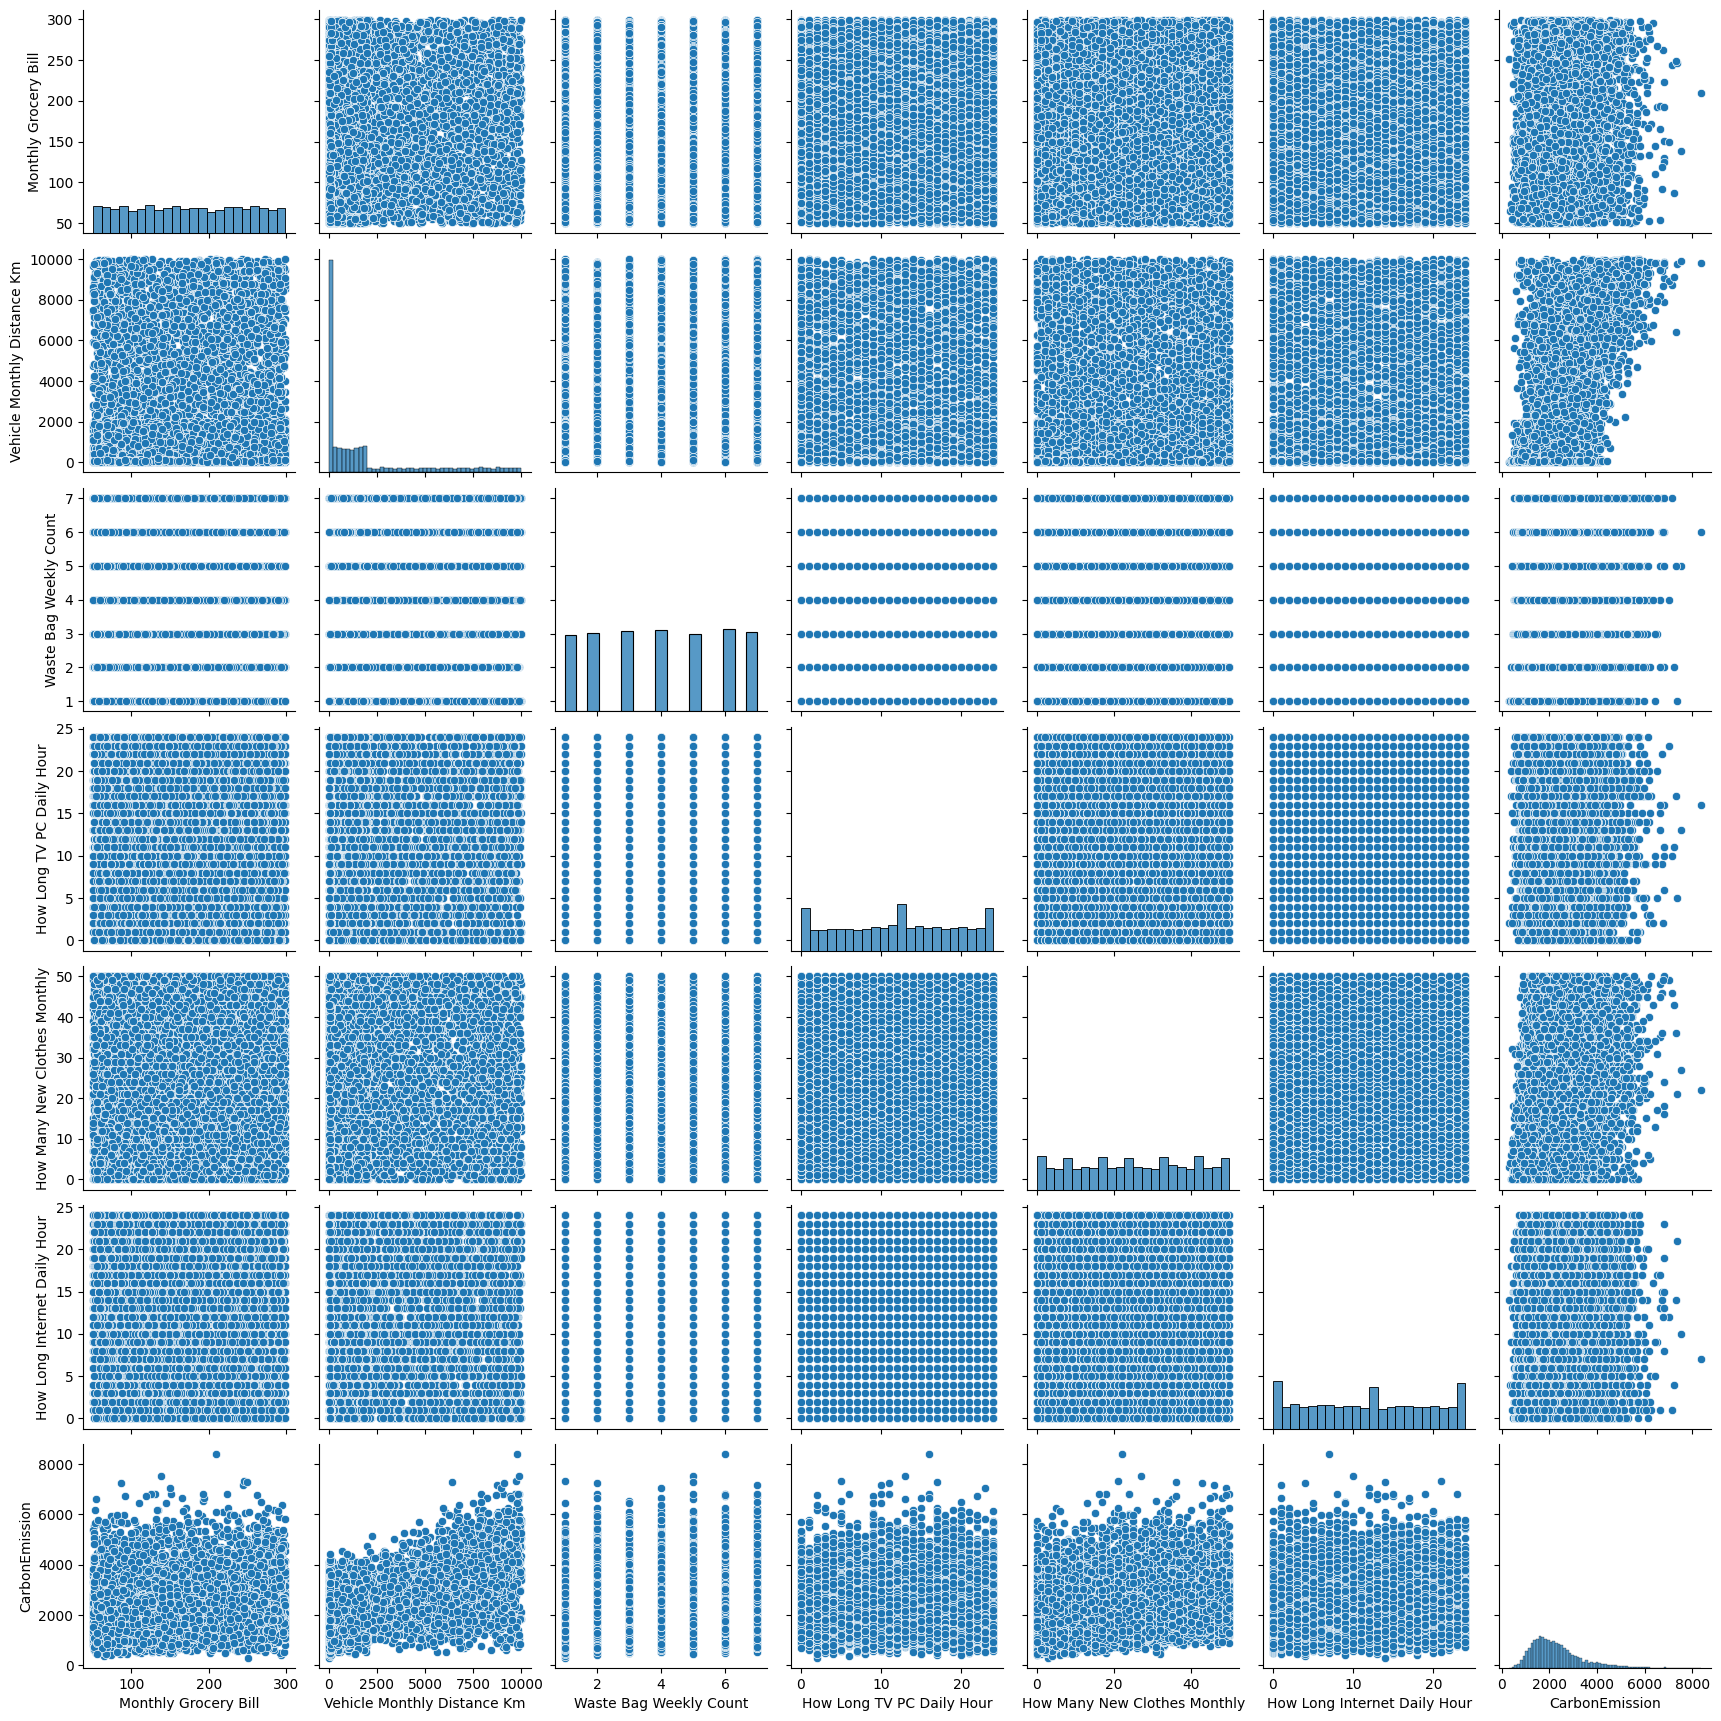

In [9]:
# 4. Pair Plot for Numerical Features
sns.pairplot(data[numerical_features_with_target])
plt.show()

In [10]:
# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [11]:
# Prepare data for training
X = data[numerical_features + categorical_features]
y = data['CarbonEmission']


In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Monthly Grocery Bill',
                                                   'Vehicle Monthly Distance '
                                                   'Km',
                                                   'Waste Bag Weekly Count',
                                                   'How Long TV PC Daily Hour',
                                                   'How Many New Clothes '
                                                   'Monthly',
                                                   'How Long Internet Daily '
                                                   'Hour']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Body Type', 'Sex', 'Diet',
                                                   'How Often Shower',
                                                   'Heating Energy Source',
                                                   'Transport',
                                                   'Social Activity',
                                                   'Frequency of Traveling by '
                                                   'Air',
                                                   'Waste Bag Size',
                                                   'Energy efficiency',
                                                   'Vehicle Type'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [13]:
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 79916.97021325
R2 Score: 0.9231352025933526


C:\Users\HP\AppData\Local\Temp\ipykernel_13592\1668910550.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')


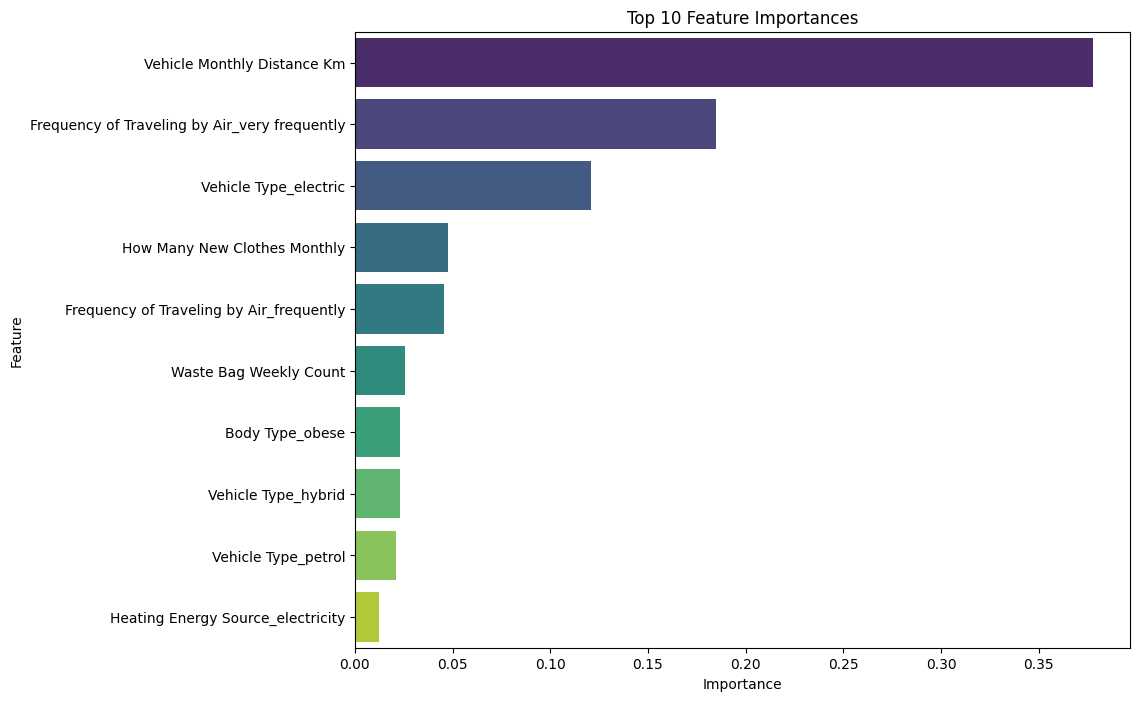

In [15]:
# Feature Importance Analysis
# Extract feature importance from the model
rf_model = model.named_steps['regressor']
feature_names = numerical_features + list(model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())
importance = rf_model.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Feature Importances')
plt.show()


In [16]:
# Example Prediction
example_data = pd.DataFrame({
    'Monthly Grocery Bill': [400],
    'Vehicle Monthly Distance Km': [100],
    'Waste Bag Weekly Count': [5],
    'How Long TV PC Daily Hour': [6],
    'How Many New Clothes Monthly': [2],
    'How Long Internet Daily Hour': [8],
    'Body Type': ['Sedan'],
    'Sex': ['Female'],
    'Diet': ['Vegetarian'],
    'How Often Shower': ['Daily'],
    'Heating Energy Source': ['Electric'],
    'Transport': ['Public'],
    'Social Activity': ['Weekly'],
    'Frequency of Traveling by Air': ['Rarely'],
    'Waste Bag Size': ['Medium'],
    'Energy efficiency': ['Average']
})

# Apply preprocessing and prediction
example_transformed = model.named_steps['preprocessor'].transform(example_data)
example_prediction = rf_model.predict(example_transformed)
print(f"Predicted Carbon Emission: {example_prediction[0]:.2f} kg CO2")

ValueError: columns are missing: {'Vehicle Type'}